<a href="https://colab.research.google.com/github/DiDevv/Portifolio-Data-Scientist/blob/main/An%C3%A1lise_Dataset_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os dados aqui utilizados foram retirados do site de dados abertos do Governo Federal, você pode encontrá-lo aqui: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

##Objetivo
O objetivo da análise desses dados é descobrir o impácto da vulnerabilidade social no desempenho dos participantes do Exame Nacional do Ensino Médio.

#Importação dos Microdados do Enem 2022

In [1]:
#Bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lendo o CSV do Dataset
microdados_enem2022 = pd.read_csv("/content/drive/MyDrive/Colab Datasets/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv", sep=";", encoding='ISO-8859-1')

In [3]:
#Examinando as colunas
microdados_enem2022.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

#Limpeza de Dados

In [4]:
#Separando as colunas que serão analisadas
colunas_selecionadas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
        'TP_COR_RACA','TP_ESCOLA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q006']

In [5]:
#Filtrando as colunas em uma nova variável
microdados_filtrados = microdados_enem2022.filter(items= colunas_selecionadas)

In [6]:
#Verificando se há dados duplicados
microdados_filtrados.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3476100     True
3476101     True
3476102    False
3476103     True
3476104     True
Length: 3476105, dtype: bool

In [7]:
#Removendo os dados duplicados
microdados_filtrados = microdados_filtrados.drop_duplicates()

In [8]:
#Exibindo o início dos meus dados
microdados_filtrados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,14,M,2,1,NaN,NaN,NaN,NaN,NaN,B
1,14,M,1,1,NaN,NaN,NaN,NaN,NaN,Q
2,5,F,2,1,421.1,546.0,498.8,565.3,760.0,B
3,6,M,3,1,490.7,388.6,357.8,416.0,320.0,A
4,4,M,3,1,NaN,NaN,NaN,NaN,NaN,B


In [9]:
#Remoção dos NaN, que são dados nulos de pessoas que faltaram a avaliação.
microdados_filtrados.dropna()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
2,5,F,2,1,421.1,546.0,498.8,565.3,760.0,B
3,6,M,3,1,490.7,388.6,357.8,416.0,320.0,A
7,6,F,2,1,398.1,427.3,400.2,404.9,440.0,B
9,4,F,3,1,467.5,461.0,466.7,435.3,360.0,B
11,2,F,1,3,458.7,539.8,488.2,456.8,940.0,B
...,...,...,...,...,...,...,...,...,...,...
3476095,12,M,1,1,444.5,504.4,489.5,423.6,580.0,C
3476097,11,F,2,1,536.1,633.2,584.0,596.3,740.0,D
3476098,2,M,3,2,487.6,495.6,545.5,597.4,580.0,B
3476099,11,F,1,1,512.5,524.8,546.8,432.0,520.0,B


#Analisando a Faixa Etária dos participantes



In [10]:
#Criando uma variável que irá armazenar a coluna 'faixa etária'
faixa_etaria = microdados_filtrados['TP_FAIXA_ETARIA']

In [11]:
#Fazendo a contagem de quantas pessoas de cada faixa etária realizaram o exame.
faixa_etaria.value_counts().sort_index()

1     272614
2     610374
3     627698
4     286091
5     161762
6     102663
7      72846
8      53947
9      40098
10     32947
11     96164
12     51493
13     37773
14     26333
15     16925
16     10284
17      5736
18      2406
19      1037
20       427
Name: TP_FAIXA_ETARIA, dtype: int64

Faixas etárias de acordo com a documentação oficial do Dataset


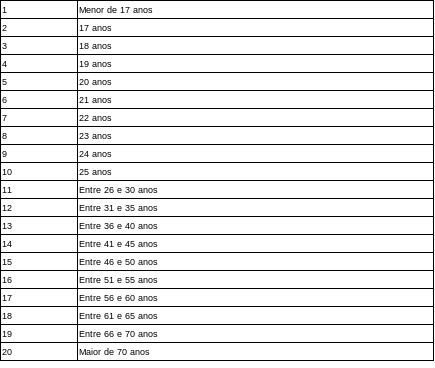

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='Count'>

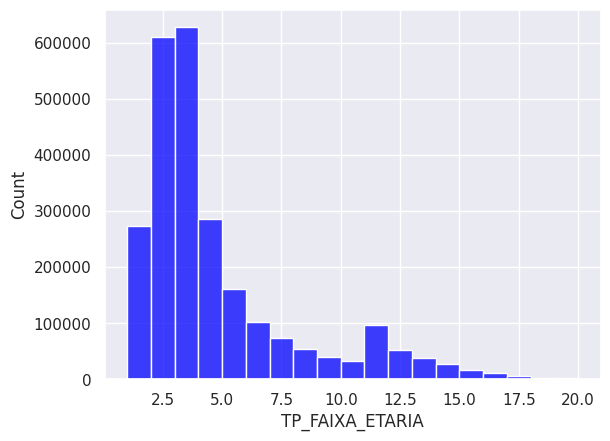

In [12]:
#Criação de um histograma para a visualização desses dados
sns.set_theme()
sns.histplot(faixa_etaria, binwidth=1 ,  color='blue')

Notamos que a faixa etária com maiores números de inscritos são entre 17 a 19 anos.

Observamos também o interesse das pessoas mais velhas em aderir ao exame, na tabela pudemos descobrir que 578 pessoas com mais de 70 anos foram realizar a prova.

#Analisando desempenho dos participantes de acordo com a faixa-etária





In [13]:
#Armazenando as colunas que eu quero analizar
faixaetaria_vs_nota = ['TP_FAIXA_ETARIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO']

In [14]:
#filtrando essas colunas de dentro da base de dados principal
analise_desempenho = microdados_filtrados.filter(items= faixaetaria_vs_nota)

In [15]:
#Verificando a exibição desses dados
analise_desempenho

,TP_FAIXA_ETARIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,14,NaN,NaN,NaN,NaN,NaN
1,14,NaN,NaN,NaN,NaN,NaN
2,5,421.1,546.0,498.8,565.3,760.0
3,6,490.7,388.6,357.8,416.0,320.0
4,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3476095,12,444.5,504.4,489.5,423.6,580.0
3476097,11,536.1,633.2,584.0,596.3,740.0
3476098,2,487.6,495.6,545.5,597.4,580.0
3476099,11,512.5,524.8,546.8,432.0,520.0


In [16]:
#Removendo os dados nulos de dentro da minha tabela para não interferir na minha análise
analise_desempenho.dropna().head()

,TP_FAIXA_ETARIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2,5,421.1,546.0,498.8,565.3,760.0
3,6,490.7,388.6,357.8,416.0,320.0
7,6,398.1,427.3,400.2,404.9,440.0
9,4,467.5,461.0,466.7,435.3,360.0
11,2,458.7,539.8,488.2,456.8,940.0


In [17]:
#Agrupando os dados de acordo com o que quero analisar e retirando a mediana que é uma medida estatística menos sensíveis a valores extremos, sendo mais útil para essa análise
analise_desempenho.groupby('TP_FAIXA_ETARIA').median()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_FAIXA_ETARIA,,,,,
1,483.60,534.00,531.50,549.25,660.0
2,487.40,531.80,527.80,541.70,660.0
3,483.00,526.00,522.40,528.10,640.0
4,482.90,526.10,524.00,524.30,620.0
5,486.40,528.30,526.70,526.50,620.0
6,490.50,531.60,528.90,527.70,620.0
7,491.50,533.40,530.20,528.70,620.0
8,491.30,534.30,530.20,525.50,600.0
9,491.35,534.60,530.05,524.80,600.0


#Análise socioeconômica relacionada ao desempenho dos estudantes

In [18]:
#Criando uma variável que irá armazenar as colunas necessárias
renda_vs_desempenho = ['Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO']

In [19]:
#Filtrando meus dados da base de dados principal
analise_socioeconomica = microdados_filtrados.filter(items= renda_vs_desempenho)

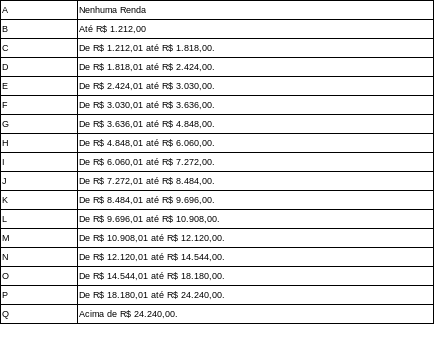

In [20]:
#Realizando a limpeza de dados nulos de dentro da minha tabela
analise_socioeconomica.dropna()

,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2,B,421.1,546.0,498.8,565.3,760.0
3,A,490.7,388.6,357.8,416.0,320.0
7,B,398.1,427.3,400.2,404.9,440.0
9,B,467.5,461.0,466.7,435.3,360.0
11,B,458.7,539.8,488.2,456.8,940.0
...,...,...,...,...,...,...
3476095,C,444.5,504.4,489.5,423.6,580.0
3476097,D,536.1,633.2,584.0,596.3,740.0
3476098,B,487.6,495.6,545.5,597.4,580.0
3476099,B,512.5,524.8,546.8,432.0,520.0


In [81]:
#Mais uma vez utilizando a mediana para analizar as notas, e agrupando os dados em relação ao indice de vulterabilidade social, informado no questionário Q00
analise_socioeconomica.groupby('Q006').median()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,450.9,484.0,468.4,455.3,560.0
B,460.4,498.5,490.9,476.3,580.0
C,475.0,520.0,516.2,510.7,600.0
D,483.8,530.6,527.4,530.6,620.0
E,493.1,540.7,536.8,550.6,640.0
F,502.5,549.6,544.3,569.4,660.0
G,509.9,556.6,550.4,580.8,680.0
H,520.6,565.8,558.3,597.3,700.0
I,530.8,574.3,564.8,612.4,720.0


In [22]:
#Selecionando agora apenas as colunas do questionário Q006 e o Número de inscrição, para descobrir quantos participantes estão em cada faixa de renda.
dados = ['Q006', 'NU_INSCRICAO']

In [23]:
Q006_quantidade = microdados_enem2022.filter(items=dados )

In [24]:
#Exibindo a quantidade de participantes em cada situação socioeconômica
Q006_quantidade.groupby('Q006').count()

,NU_INSCRICAO
Q006,
A,204475
B,1022869
C,584278
D,414266
E,276704
F,158091
G,194319
H,188751
I,78916


Aqui nessa tabela, temos as informações da quantidade de inscritos em cada faixa de renda.
Podemos observar que 1,022,869 participantes (que representam 29,4% do total)estão vivendo em um lar cuja faixa de renda é de apenas um salário mínimo, e 204,475 (5,8%) deles  sequer possuem renda.

In [63]:
#Organizando os dados para a plotagem
p = analise_socioeconomica.groupby('Q006').value_counts()

<Axes: xlabel='Q006', ylabel='NU_NOTA_REDACAO'>

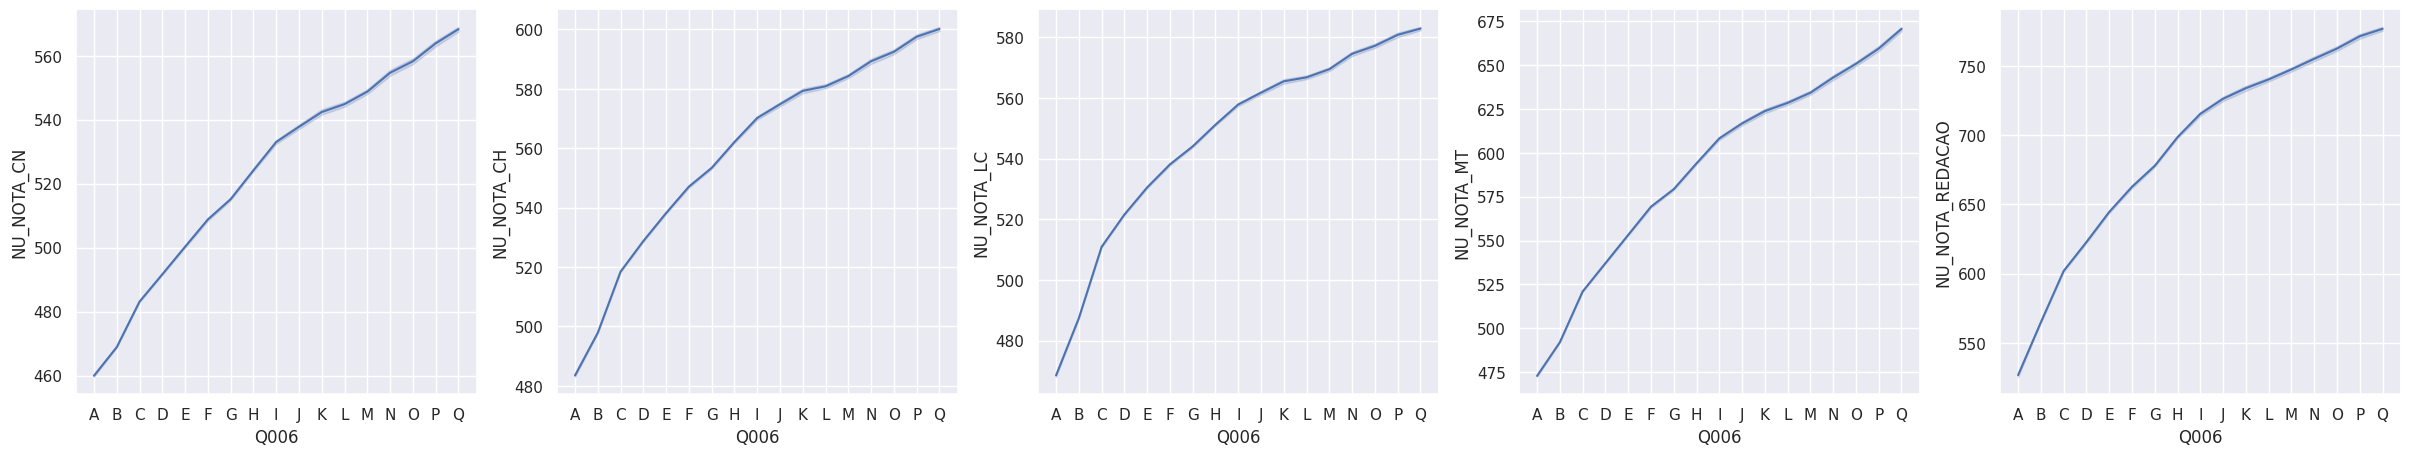

In [80]:
#Plotando os gráficos um ao lado do outro com o auxilio da biblioteca matplotlib.pyplot
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
sns.lineplot(ax=axes[0], data=p, x='Q006', y='NU_NOTA_CN')
sns.lineplot(ax=axes[1], data=p, x='Q006', y='NU_NOTA_CH')
sns.lineplot(ax=axes[2], data=p, x='Q006', y='NU_NOTA_LC')
sns.lineplot(ax=axes[3], data=p, x='Q006', y='NU_NOTA_MT')
sns.lineplot(ax=axes[4], data=p, x='Q006', y='NU_NOTA_REDACAO')

É ainda mais assustador quando observamos o gráfico de desempenho dos participantes e notamos que quanto maior a vulnerabilidade social, menor são as notas em todas as áreas do conhecimento.

Mais um âmbito onde os meus são engolidor pela sociedade e sequer tem a chance de estudar para melhorar a situação econômica e tentar viver nesse país onde os mesmos apenas sobrevivem.


"A educação é a arma mais poderosa que você pode usar para mudar o mundo." - Nelson Mandela.